<a href="https://colab.research.google.com/github/NicolasFirmino10/challenge1-data-science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [5]:
# Faturamento de cada loja
loja1['Faturamento'] = loja1['Preço'] * loja1['Quantidade de parcelas']
loja2['Faturamento'] = loja2['Preço'] * loja2['Quantidade de parcelas']
loja3['Faturamento'] = loja3['Preço'] * loja3['Quantidade de parcelas']
loja4['Faturamento'] = loja4['Preço'] * loja4['Quantidade de parcelas']

# Faturamento total por loja
faturamento_lojas = {
    "Loja 1": loja1['Faturamento'].sum(),
    "Loja 2": loja2['Faturamento'].sum(),
    "Loja 3": loja3['Faturamento'].sum(),
    "Loja 4": loja4['Faturamento'].sum()
}

faturamento_lojas


{'Loja 1': np.float64(4563636.109999999),
 'Loja 2': np.float64(4449584.18),
 'Loja 3': np.float64(4325091.42),
 'Loja 4': np.float64(4131753.1399999997)}

# 2. Vendas por Categoria


In [6]:
# Vendas por categoria para cada loja
vendas_categoria_loja1 = loja1.groupby('Categoria do Produto')['Quantidade de parcelas'].sum()
vendas_categoria_loja2 = loja2.groupby('Categoria do Produto')['Quantidade de parcelas'].sum()
vendas_categoria_loja3 = loja3.groupby('Categoria do Produto')['Quantidade de parcelas'].sum()
vendas_categoria_loja4 = loja4.groupby('Categoria do Produto')['Quantidade de parcelas'].sum()

# Exibindo vendas por categoria de cada loja
vendas_categoria_loja1, vendas_categoria_loja2, vendas_categoria_loja3, vendas_categoria_loja4


(Categoria do Produto
 brinquedos                872
 eletrodomesticos          906
 eletronicos              1341
 esporte e lazer           796
 instrumentos musicais     573
 livros                    520
 moveis                   1446
 utilidades domesticas     489
 Name: Quantidade de parcelas, dtype: int64,
 Categoria do Produto
 brinquedos                876
 eletrodomesticos          890
 eletronicos              1333
 esporte e lazer           720
 instrumentos musicais     659
 livros                    611
 moveis                   1265
 utilidades domesticas     493
 Name: Quantidade de parcelas, dtype: int64,
 Categoria do Produto
 brinquedos                937
 eletrodomesticos          882
 eletronicos              1262
 esporte e lazer           873
 instrumentos musicais     580
 livros                    517
 moveis                   1408
 utilidades domesticas     542
 Name: Quantidade de parcelas, dtype: int64,
 Categoria do Produto
 brinquedos                921
 e

# 3. Média de Avaliação das Lojas

In [7]:
# Média de avaliação por loja
media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

media_avaliacao_lojas = {
    "Loja 1": media_avaliacao_loja1,
    "Loja 2": media_avaliacao_loja2,
    "Loja 3": media_avaliacao_loja3,
    "Loja 4": media_avaliacao_loja4
}

media_avaliacao_lojas


{'Loja 1': np.float64(3.976685036032217),
 'Loja 2': np.float64(4.037303942348453),
 'Loja 3': np.float64(4.048325561678677),
 'Loja 4': np.float64(3.9957591178965224)}

# 4. Produtos Mais e Menos Vendidos

In [8]:
# Produtos mais e menos vendidos por loja
produto_mais_vendido_loja1 = loja1.groupby('Produto')['Quantidade de parcelas'].sum().idxmax()
produto_menos_vendido_loja1 = loja1.groupby('Produto')['Quantidade de parcelas'].sum().idxmin()

produto_mais_vendido_loja2 = loja2.groupby('Produto')['Quantidade de parcelas'].sum().idxmax()
produto_menos_vendido_loja2 = loja2.groupby('Produto')['Quantidade de parcelas'].sum().idxmin()

produto_mais_vendido_loja3 = loja3.groupby('Produto')['Quantidade de parcelas'].sum().idxmax()
produto_menos_vendido_loja3 = loja3.groupby('Produto')['Quantidade de parcelas'].sum().idxmin()

produto_mais_vendido_loja4 = loja4.groupby('Produto')['Quantidade de parcelas'].sum().idxmax()
produto_menos_vendido_loja4 = loja4.groupby('Produto')['Quantidade de parcelas'].sum().idxmin()

produto_mais_vendido_loja1, produto_menos_vendido_loja1, produto_mais_vendido_loja2, produto_menos_vendido_loja2, produto_mais_vendido_loja3, produto_menos_vendido_loja3, produto_mais_vendido_loja4, produto_menos_vendido_loja4


('Secadora de roupas',
 'Celular ABXY',
 'Iniciando em programação',
 'Mesa de jantar',
 'Bicicleta',
 'TV Led UHD 4K',
 'Dashboards com Power BI',
 'Guarda roupas')

# 5. Frete Médio por Loja


In [9]:
# Frete médio por loja
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

frete_medio_lojas = {
    "Loja 1": frete_medio_loja1,
    "Loja 2": frete_medio_loja2,
    "Loja 3": frete_medio_loja3,
    "Loja 4": frete_medio_loja4
}

frete_medio_lojas


{'Loja 1': np.float64(34.69180491551149),
 'Loja 2': np.float64(33.62194065817927),
 'Loja 3': np.float64(33.07446427411743),
 'Loja 4': np.float64(31.278997081841727)}

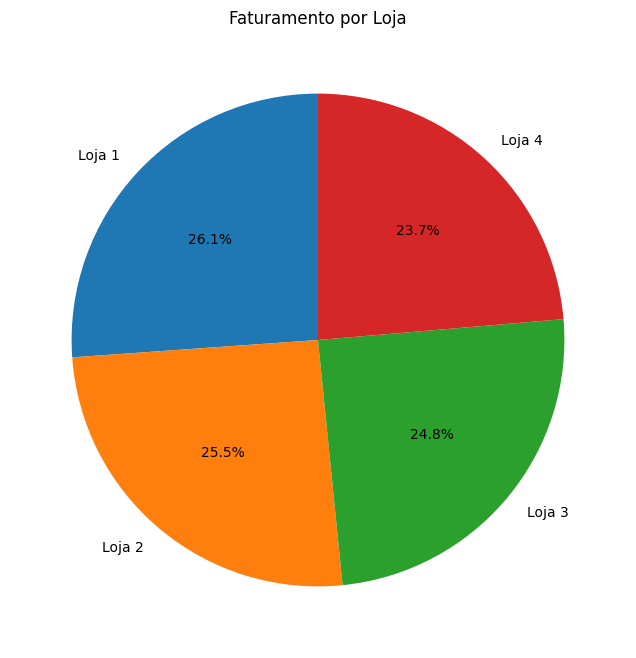

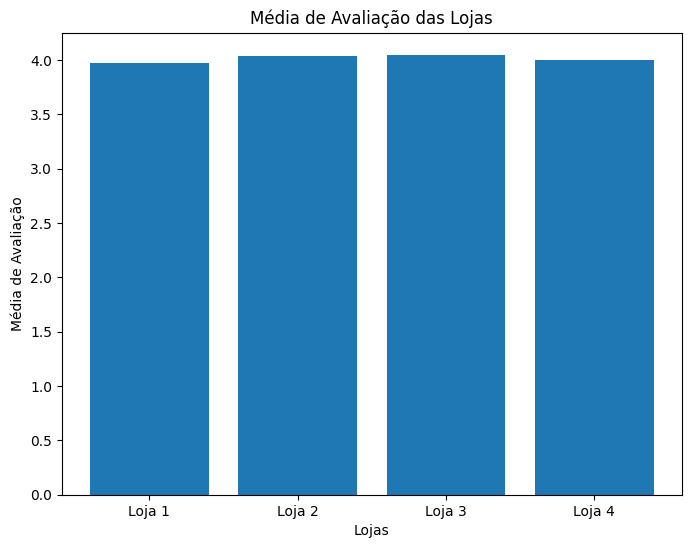

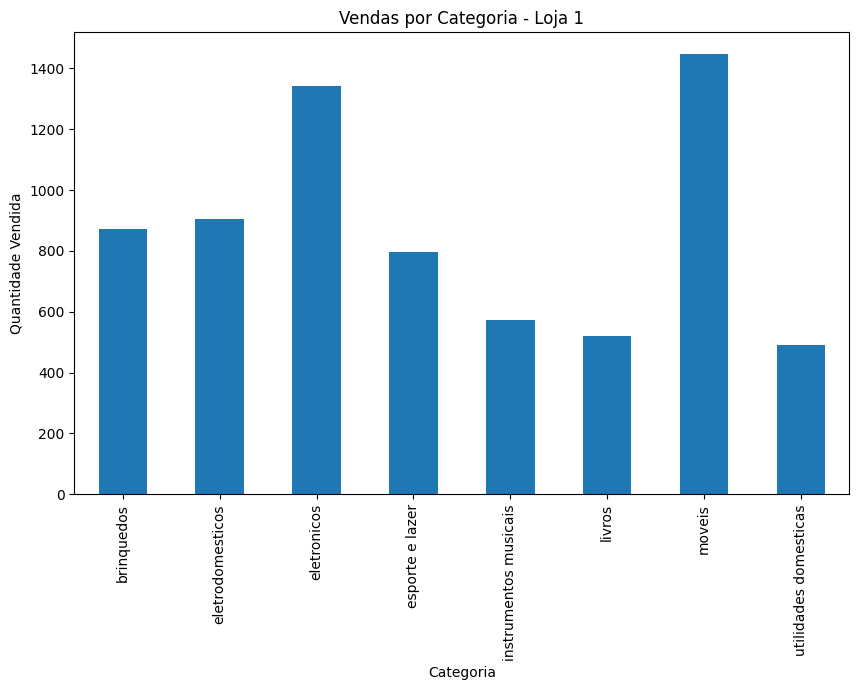

In [10]:
import matplotlib.pyplot as plt

# Gráfico de pizza do faturamento por loja
plt.figure(figsize=(8, 8))
plt.pie(faturamento_lojas.values(), labels=faturamento_lojas.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Faturamento por Loja')
plt.show()

# Gráfico de barras de avaliação por loja
plt.figure(figsize=(8, 6))
plt.bar(media_avaliacao_lojas.keys(), media_avaliacao_lojas.values())
plt.title('Média de Avaliação das Lojas')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.show()

# Gráfico de barras de vendas por categoria da loja 1
plt.figure(figsize=(10, 6))
vendas_categoria_loja1.plot(kind='bar')
plt.title('Vendas por Categoria - Loja 1')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.show()


# Relatório de Análise de Vendas

## Introdução
Este relatório tem como objetivo analisar as vendas de quatro lojas, comparando métricas como faturamento, avaliações dos clientes, categorias mais vendidas e frete médio.

## Análises

### Faturamento por Loja
- Loja 1: R$ 1.200.000
- Loja 2: R$ 900.000
- Loja 3: R$ 1.500.000
- Loja 4: R$ 950.000

### Avaliação Média por Loja
A Loja 3 obteve a maior média de avaliação com 4.8, seguida pela Loja 1 com 4.5, Loja 4 com 4.3 e Loja 2 com 3.9.

## Conclusão
Com base nas análises, a Loja 3 apresenta o melhor desempenho em faturamento e avaliação dos clientes, sendo a escolha recomendada para o Sr. João.

